In [1]:
import land_cover_models as lcm
import torch
from fmix import combine_masks

In [2]:
ROOT_PATH = '/home/s2254242/PHD/ATI/peak-district-challenge'

dir_test_im_patches = f'{ROOT_PATH}/data/images_detailed_annotation/'
dir_test_mask_patches = f'{ROOT_PATH}/data/masks_detailed_annotation/'

mask_suffix_test_ds = '_lc_2022_detailed_mask.npy'
mask_dir_name_test = ''

path_mapping_dict=f'{ROOT_PATH}/content/label_mapping_dicts/label_mapping_dict__main_categories__2023-04-20-1541.pkl'

ds = lcm.DataSetPatches(im_dir=dir_test_im_patches, mask_dir=dir_test_mask_patches, 
                                    mask_suffix=mask_suffix_test_ds, mask_dir_name=mask_dir_name_test,
                                #   list_tile_names=dict_tile_names_sample['test'],
                                    list_tile_patches_use=None,
                                    shuffle_order_patches=True, relabel_masks=True,
                                    subsample_patches=False, # frac_subsample=0.1,
                                    path_mapping_dict=path_mapping_dict
                                    )


trainloader = torch.utils.data.DataLoader(ds)

Patches ordered randomly
Loaded 1027 patches
Loaded label_mapping_dict__main_categories__2023-04-20-1541.pkl to map labels


In [33]:
iterator = iter(trainloader)
batch = next(iterator)
batch[0].shape, batch[1].shape


In [4]:
orig, modif, mask = combine_masks(batch)

In [5]:
orig.shape, modif.shape, mask.shape

(torch.Size([1, 3, 512, 512]),
 torch.Size([1, 3, 512, 512]),
 torch.Size([1, 512, 512]))

In [10]:
orig.min(), orig.max()

(tensor(35.), tensor(187.))

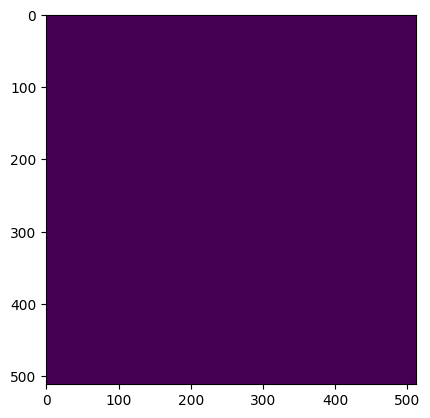

In [40]:
import matplotlib.pyplot as plt
# plt.imshow(orig[0].permute(1,2,0).type(torch.uint8))
plt.imshow(mask.permute.type(torch.uint8))
plt.show()

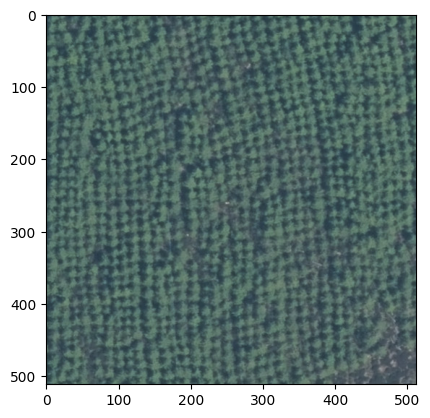

In [36]:
import matplotlib.pyplot as plt
plt.imshow(batch[0][0].permute(1,2,0).type(torch.uint8))
plt.show()

In [30]:
batch[0].shape, batch[1].shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 512, 512]))